# Random Forests as a Regressor

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [4]:
diabetes = datasets.load_diabetes()

In [5]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [6]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [8]:
X = diabetes.data
y = diabetes.target

X.shape, y.shape

((442, 10), (442,))

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)

In [10]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [11]:
regressor = RandomForestRegressor(n_estimators=100,random_state=42)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

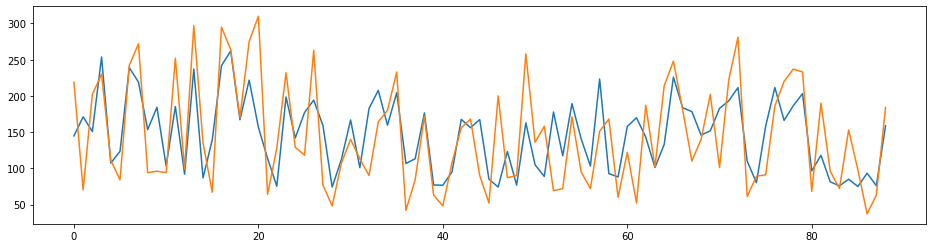

In [12]:
plt.figure(figsize=(16,4))
plt.plot(y_pred)
plt.plot(y_test)

In [14]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
RMSE   # RMSE of DT was 72.78

54.27053168146379

In [15]:
y_test.std()

72.78840394263774

# Random Forests as a Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
iris = datasets.load_iris()

In [21]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [22]:
X = iris.data
y = iris.target

X.shape,y.shape

((150, 4), (150,))

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3 , random_state = 1,stratify=y)

In [26]:
clf = RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy of Random Forest: ",metrics.accuracy_score(y_test,y_pred))

Accuracy of Random Forest:  0.9777777777777777


In [27]:
mat = metrics.confusion_matrix(y_test,y_pred)
mat

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

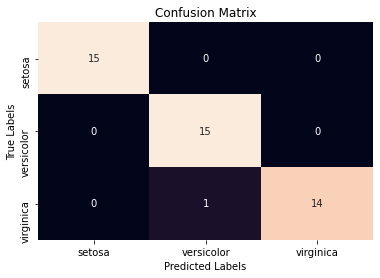

In [28]:
sns.heatmap(mat,annot=True,fmt='d',cbar=False,xticklabels=iris.target_names,yticklabels=iris.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [30]:
# help(clf)

In [31]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [33]:
clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [32]:
clf.feature_importances_

array([0.1160593 , 0.03098375, 0.43034957, 0.42260737])